# Table of Contents
 <p><div class="lev2"><a href="#Individual-Trajectories-are-Confined"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Individual Trajectories are Confined</a></div><div class="lev2"><a href="#MS(C)Ds-Measure-Confinement"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>MS(C)Ds Measure Confinement</a></div><div class="lev3"><a href="#MSCDs"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>MSCDs</a></div><div class="lev3"><a href="#MSDs"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>MSDs</a></div><div class="lev2"><a href="#TODO:-figure-out-what-the-above-histogram-should-look-like-if-the-loops-locations-are-Poisson-(as-in-simulation)"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>TODO: figure out what the above histogram should look like if the loops locations are Poisson (as in simulation)</a></div><div class="lev2"><a href="#Simulation-MS(C)Ds"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Simulation MS(C)Ds</a></div><div class="lev2"><a href="#Data-MS(C)Ds"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Data MS(C)Ds</a></div>

In [1]:
from pathlib import Path
import importlib

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from bruno_util import plotting as bplt
import scipy
import scipy.stats

import multi_locus_analysis as mla
import multi_locus_analysis.examples.burgess as burgess
from multi_locus_analysis.examples.burgess import msds

## Grouped Trajectories Appear not Confined

### MSDs

In [23]:
msds = pd.read_csv(burgess.burgess_dir / Path('msds_vel_double_counted.csv'))

These trajectories suggest that some process "faster" than Rouse diffusion is driving the motion on short time scales, but is eventually overcome by regular Rouse motion, to allow exploration of a large space, wh

By counting pixels, we can see that the cells themselves tend to be ~6um in diameter (3um radius), while the nuclei are expected to be about 2x smaller or even a little less, so 1-1.5um in radius.

Recall when viewing that yeast cells undergo "closed" mitosis (and meiosis), so the nuclear envelope will not have broken down.

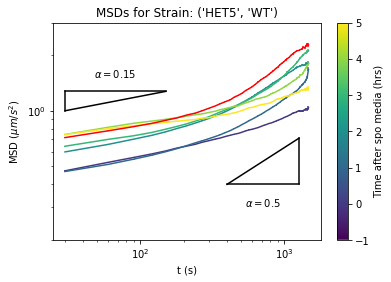

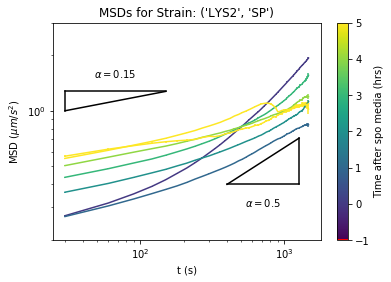

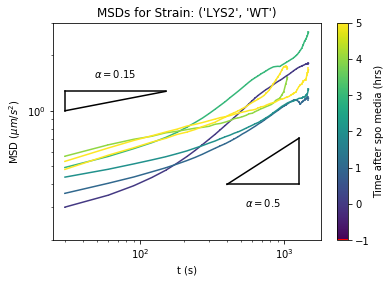

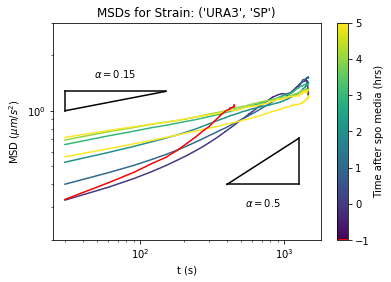

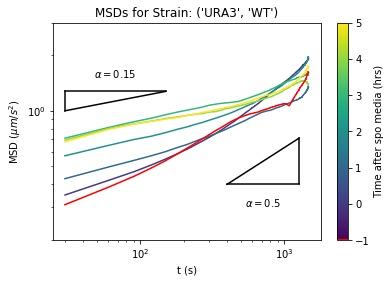

In [39]:
for strain, d in msds.groupby(['locus', 'genotype']):
    plt.figure()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('t (s)')
    plt.ylabel('MSD ($\mu{}m/s^2$)')
    plt.title('MSDs for Strain: ' + str(strain))
    cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
    cmap = mpl.cm.get_cmap('viridis')
    cmap.colors[0] = [1, 0, 0] # make t=-1 gray
    cmap.colors[1] = [1, 0, 0] # make t=-1 gray
    sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
    sm.set_array([])
    for meiosis, data in d.groupby('meiosis'):
        t = -1 if meiosis[1] == 'a' else int(meiosis[1])
        data = data[data['delta'] > 0]
        plt.errorbar(data['delta'], data['mean'], data['ste'], c=cmap(cnorm(t)))
    cb = plt.colorbar(sm)
    cb.set_label('Time after spo media (hrs)')
    bplt.draw_power_law_triangle(alpha=0.15, x0=[30, 1], width=0.7, orientation='up', x0_logscale=False, label=r'$\alpha=0.15$')
    bplt.draw_power_law_triangle(alpha=0.5, x0=[400, 0.4], width=0.5, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
    plt.ylim([0.2, 3])
    

In [93]:
free_het = burgess.df.loc['HET5', 'WT', :, 'ta']
free_msds = burgess.msds.msd(free_het, mscd=False, include_z=True, 
                             traj_group=['exp.rep', 'cell'],
                             groups=['exp.rep', 'cell'])

[1002.3744672545444, 0.67]

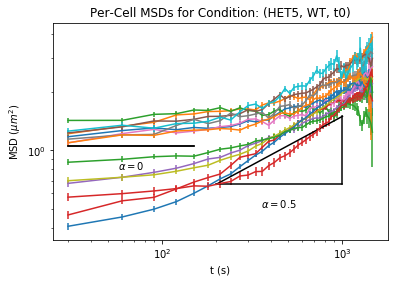

In [96]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSD ($\mu{}m^2$)')
plt.title('Per-Cell MSDs for Condition: (HET5, WT, t0)')
for i, (cell_id, data) in enumerate(free_msds.groupby(['exp.rep', 'cell'])):
    if not i % 5 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
    plt.errorbar(data['delta'], data['mean'], data['ste'])
#     plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
bplt.draw_power_law_triangle(alpha=0.5, x0=[200, 0.67], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
# plt.ylim([0.05, 2])


### MSCDs

In [11]:
mscds = pd.read_csv(burgess.burgess_dir / Path('msds_dvel.csv'))

On the other hand, the MSCDs largely look like they're slowly approaching some sort of very soft confinement, with some notable exceptions (LYS2, :, t0) 

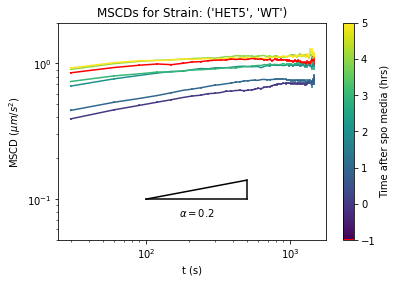

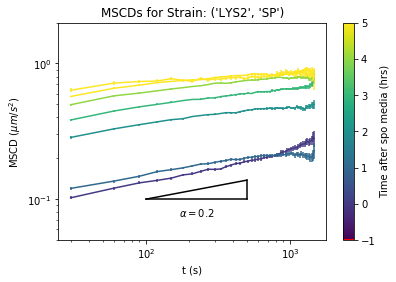

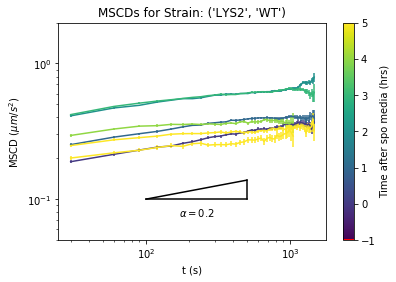

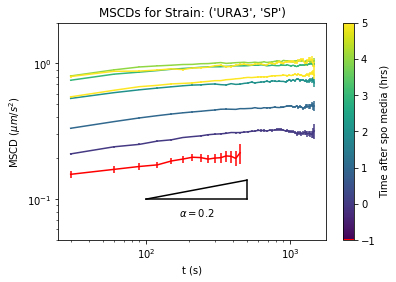

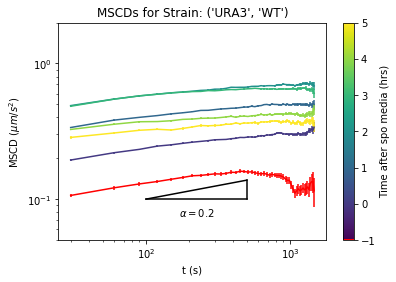

In [53]:
cmap = mpl.cm.get_cmap('viridis')
for i in range(10):
    cmap.colors[i] = [1, 0, 0] # make t=-1 red
for strain, d in mscds.groupby(['locus', 'genotype']):
    plt.figure()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('t (s)')
    plt.ylabel('MSCD ($\mu{}m/s^2$)')
    plt.title('MSCDs for Strain: ' + str(strain))
    cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
    sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
    sm.set_array([])
    for meiosis, data in d.groupby('meiosis'):
        t = -1 if meiosis[1] == 'a' else int(meiosis[1])
        data = data[data['delta'] > 0]
        plt.errorbar(data['delta'], data['mean'], data['ste'], c=cmap(cnorm(t)))
    cb = plt.colorbar(sm)
    cb.set_label('Time after spo media (hrs)')
    bplt.draw_power_law_triangle(alpha=0.2, x0=[100, 0.1], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.2$')
    plt.ylim([0.05, 2])
    

## Individual Trajectories are Confined

Let's compare individual trajectories from one of the "confined" groups to one of the "less confined" groups.

### Confined Example

In [55]:
confined_group = burgess.df_flat.loc['HET5', 'WT', :, 't5'].copy()

In [56]:
confined_mscds = burgess.msds.msd(confined_group, mscd=True, include_z=True, 
                                  traj_group=['exp.rep', 'cell'],
                                  groups=['exp.rep', 'cell'])

(0.1, 3)

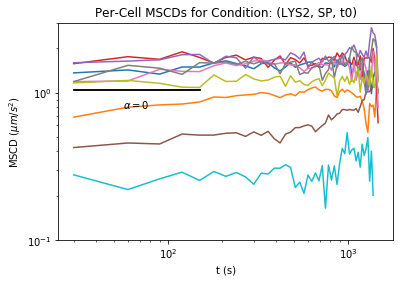

In [78]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('Per-Cell MSCDs for Condition: (HET5, SP, t0)')
for i, (cell_id, data) in enumerate(confined_mscds.groupby(['exp.rep', 'cell'])):
    if not i % 10 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
#     plt.errorbar(data['delta'], data['mean'], data['ste'])
    plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
plt.ylim([0.1, 3])


### "Free" example

In [ ]:
free_group = burgess.df_flat.loc['LYS2', 'SP', :, 't0'].copy()
free_mscds = burgess.msds.msd(free_group, mscd=True, include_z=True, 
                                  traj_group=['exp.rep', 'cell'],
                                  groups=['exp.rep', 'cell'])

Something very interesting seems to be happening at around 200s....

(0.05, 2)

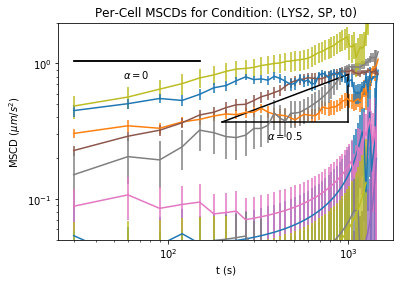

In [82]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('Per-Cell MSCDs for Condition: (LYS2, SP, t0)')
for i, (cell_id, data) in enumerate(free_mscds.groupby(['exp.rep', 'cell'])):
    if not i % 15 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
    plt.errorbar(data['delta'], data['mean'], data['ste'])
#     plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
bplt.draw_power_law_triangle(alpha=0.5, x0=[200, 0.37], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
plt.ylim([0.05, 2])


And the small slope of like 0.2 seems to be made up of a mixture of cells where the MSCD is confined (alpha=0) and diffusing like Rouse (alpha=0.5) and some WEIRD guys (accelerating????)

(0.05, 2)

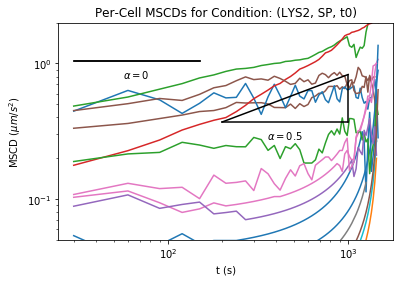

In [85]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('Per-Cell MSCDs for Condition: (LYS2, SP, t0)')
for i, (cell_id, data) in enumerate(free_mscds.groupby(['exp.rep', 'cell'])):
    if not i % 10 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
#     plt.errorbar(data['delta'], data['mean'], data['ste'])
    plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
bplt.draw_power_law_triangle(alpha=0.5, x0=[200, 0.37], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
plt.ylim([0.05, 2])


An example of a "Weird" trajectory

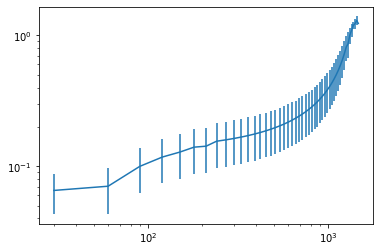

In [127]:
data = free_mscds.loc[1,5].copy()
data = data.reset_index()
data = data[(data['delta'] > 0) & (data['mean'] > 0)]
data = data.sort_values('delta')
plt.errorbar(data['delta'], data['mean'], data['ste'])
plt.yscale('log'); plt.xscale('log')

The full trajectory....

In [132]:
weird_cell = burgess.df_flat.loc['LYS2', 'SP', 1, 't0', 5]
weird_cell.head()

,t,X1,Y1,Z1,X2,Y2,Z2,foci,na_id,wait_id,dX,dY,dZ
frame,,,,,,,,,,,,,
1,0,2.39994,3.46658,7.50,3.19992,4.26656,8.00,unp,0,0,0.79998,0.79998,0.50
2,30,2.39994,3.19992,7.50,3.06659,4.13323,8.25,unp,0,0,0.66665,0.93331,0.75
3,60,2.53327,3.19992,7.50,3.06659,3.99990,8.00,unp,0,0,0.53332,0.79998,0.50
4,90,2.93326,2.93326,7.50,3.19992,3.86657,8.00,unp,0,0,0.26666,0.93331,0.50
5,120,2.93326,2.93326,7.75,2.93326,3.59991,8.00,unp,0,0,0.00000,0.66665,0.25


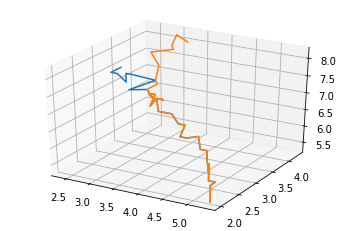

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(weird_cell['X1'], weird_cell['Y1'], weird_cell['Z1'])
ax.plot(weird_cell['X2'], weird_cell['Y2'], weird_cell['Z2'])

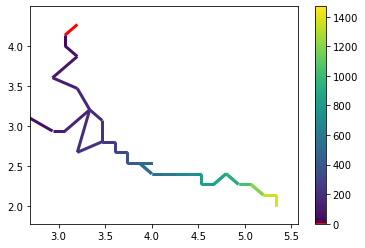

In [137]:
fig, ax = plt.subplots()
bplt.plot_colored_line(weird_cell['t'], weird_cell['X1'], weird_cell['Y1'], ax=ax)
bplt.plot_colored_line(weird_cell['t'], weird_cell['X2'], weird_cell['Y2'], ax=ax, colorbar=False)

AHHHH, I see. If they stay together, that makes weirdness....

### Classify trajectories

In [12]:
line_stats = {}
for cell_id, data in free_mscds.groupby(['exp.rep', 'cell']):
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0) & (~np.isnan(data['mean']))]
    data = data.sort_values('delta')
    X = np.log10(data['delta'])
    Y = np.log10(data['mean'])
    if len(X) == 0:
        continue
    line_stats[cell_id] = scipy.stats.linregress(X, Y)
line_stats = pd.DataFrame(line_stats).T
line_stats.columns = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']
line_stats.index.names = ['exp.rep', 'cell']

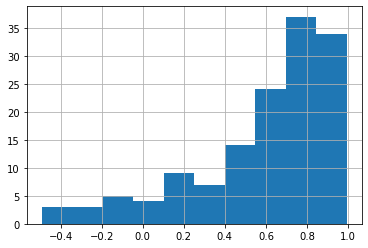

In [102]:
line_stats['rvalue'].hist()

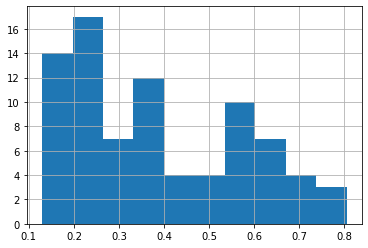

In [103]:
line_stats.loc[line_stats['rvalue'] > 0.6, 'slope'].hist()

Text(0.5, 0, 'Measured $\\alpha$ (log-log slope)')

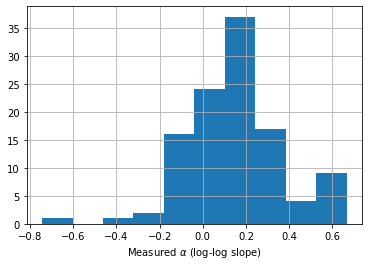

In [14]:
line_stats.loc[:, 'slope'].hist()
plt.xlabel(r'Measured $\alpha$ (log-log slope)')

## Redo MSCDs "by unp"

### Simple plots

In [138]:
mscds = pd.read_csv(burgess.burgess_dir / Path('msds_dvel_unp.csv'))

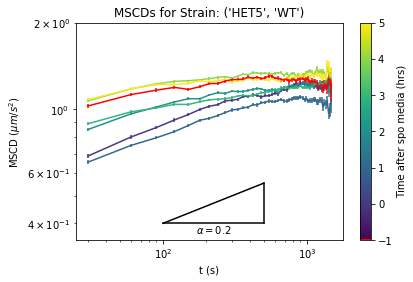

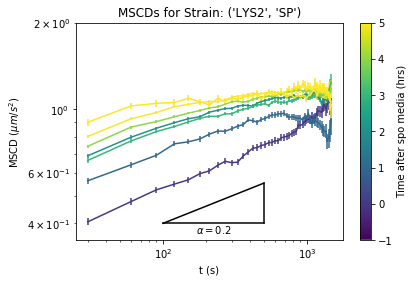

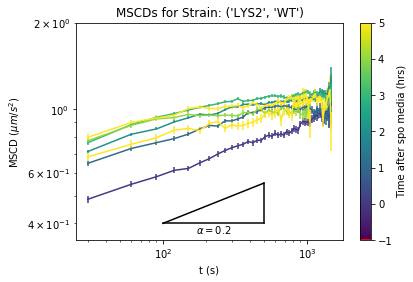

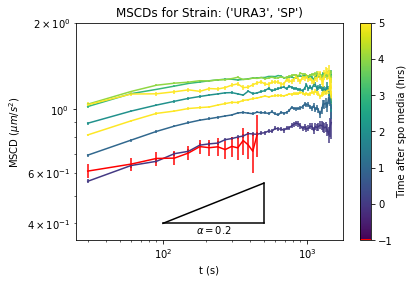

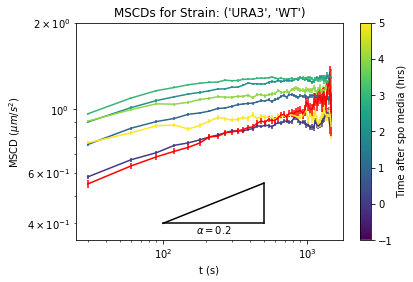

In [144]:
cmap = mpl.cm.get_cmap('viridis')
for i in range(10):
    cmap.colors[i] = [1, 0, 0] # make t=-1 red
for strain, d in mscds.groupby(['locus', 'genotype']):
    plt.figure()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('t (s)')
    plt.ylabel('MSCD ($\mu{}m/s^2$)')
    plt.title('MSCDs for Strain: ' + str(strain))
    cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
    sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
    sm.set_array([])
    for meiosis, data in d.groupby('meiosis'):
        t = -1 if meiosis[1] == 'a' else int(meiosis[1])
        data = data[data['delta'] > 0]
        plt.errorbar(data['delta'], data['mean'], data['ste'], c=cmap(cnorm(t)))
    cb = plt.colorbar(sm)
    cb.set_label('Time after spo media (hrs)')
    bplt.draw_power_law_triangle(alpha=0.2, x0=[100, 0.4], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.2$', label_padding=0.02)
    plt.ylim([0.35, 2])
    

### Example of "free" mscd

In [19]:
free_group = burgess.df_flat.loc['LYS2', 'SP', :, 't0'].copy()

In [20]:
free_mscds = burgess.msds.msd(free_group[free_group['foci'] == 'unp'], mscd=True, include_z=True, 
                              traj_group=['exp.rep', 'cell'],
                              groups=['exp.rep', 'cell'])

(0.1, 2)

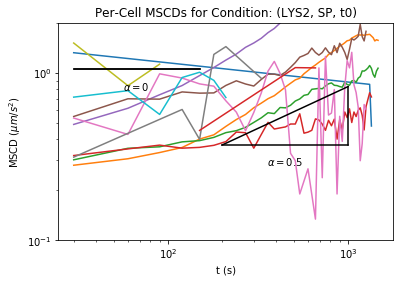

In [7]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('Per-Cell MSCDs for Condition: (LYS2, SP, t0)')
for i, (cell_id, data) in enumerate(free_mscds.groupby(['exp.rep', 'cell'])):
    if not i % 10 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
#     plt.errorbar(data['delta'], data['mean'], data['ste'])
    plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
bplt.draw_power_law_triangle(alpha=0.5, x0=[200, 0.37], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
plt.ylim([0.1, 2])


### Example(s) of "confined" mscd

In [9]:
confined_group = burgess.df_flat.loc['HET5', 'WT', :, 't5'].copy()

In [10]:
confined_mscds = burgess.msds.msd(confined_group[confined_group['foci'] == 'unp'], mscd=True, include_z=True, 
                              traj_group=['exp.rep', 'cell'],
                              groups=['exp.rep', 'cell'])

(0.2, 2)

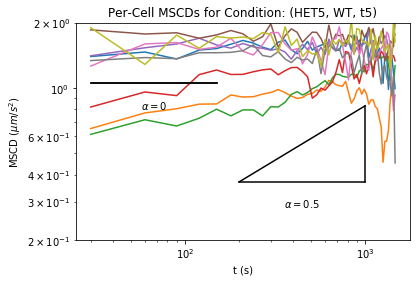

In [11]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('Per-Cell MSCDs for Condition: (HET5, WT, t5)')
for i, (cell_id, data) in enumerate(confined_mscds.groupby(['exp.rep', 'cell'])):
    if not i % 10 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
#     plt.errorbar(data['delta'], data['mean'], data['ste'])
    plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
bplt.draw_power_law_triangle(alpha=0.5, x0=[200, 0.37], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
plt.ylim([0.2, 2])


In [186]:
confined_group = burgess.df_flat.loc['HET5', 'WT', :, 't0'].copy()

In [187]:
confined_mscds = burgess.msds.msd(confined_group[confined_group['foci'] == 'unp'], mscd=True, include_z=True, 
                              traj_group=['exp.rep', 'cell'],
                              groups=['exp.rep', 'cell'])

(0.05, 2)

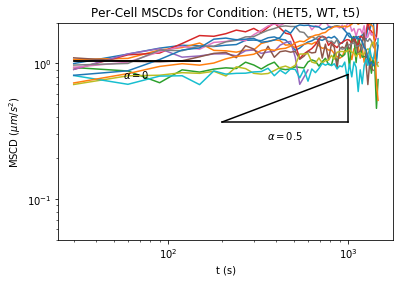

In [188]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('Per-Cell MSCDs for Condition: (HET5, WT, t5)')
for i, (cell_id, data) in enumerate(confined_mscds.groupby(['exp.rep', 'cell'])):
    if not i % 10 == 0:
        continue
    data = data.reset_index()
    data = data[(data['delta'] > 0) & (data['mean'] > 0)]
    data = data.sort_values('delta')
#     plt.errorbar(data['delta'], data['mean'], data['ste'])
    plt.plot(data['delta'], data['mean'])
bplt.draw_power_law_triangle(alpha=0, x0=[30, 1.05], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0$')
bplt.draw_power_law_triangle(alpha=0.5, x0=[200, 0.37], width=0.7, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
plt.ylim([0.05, 2])


### Power law fits

In [179]:
def linear_fit(df, cutoff=200):
    df = mla.pos_to_all_vel(df, xcol='dX', ycol='dY', zcol='dZ', framecol='t')
    df['abs(v)'] = np.sqrt(df['vx']**2 + df['vy']**2 + df['vz']**2)
    df = df.groupby('delta')['abs(v)'].mean()
    df = df.reset_index()
    df = df[(df['delta'] > cutoff) & (df['abs(v)'] > 0) & (~np.isnan(df['abs(v)']))]
    X = np.log10(df['delta'])
    Y = np.log10(df['abs(v)'])
    if len(X) <= 1:
        X = [0, 0]
        Y = [0, 0]
    return scipy.stats.linregress(X, Y)

In [189]:
alpha_fits = burgess.df_flat.groupby(burgess.cell_cols).apply(linear_fit)

In [192]:
alpha_fits = alpha_fits.apply(pd.Series)
alpha_fits.columns = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']

In [193]:
alpha_fits.to_csv('alpha_fits.csv')

In [15]:
alpha_fits = pd.read_csv('alpha_fits.csv')

In [44]:
alpha_fits.head()

,locus,genotype,exp.rep,meiosis,cell,slope,intercept,rvalue,pvalue,stderr
0,HET5,WT,2,t0,1,0.131061,-0.186090,0.538871,1.929413e-04,0.031997
1,HET5,WT,2,t0,7,-0.001073,0.213602,-0.005328,9.729477e-01,0.031460
2,HET5,WT,2,t0,8,0.138265,-0.205656,0.659413,1.517690e-06,0.024618
3,HET5,WT,2,t0,10,-0.739603,1.965666,-0.730293,8.868632e-08,0.112232
4,HET5,WT,2,t0,11,-0.065317,0.135227,-0.320094,3.638902e-02,0.030191


Text(0.5, 0, '$\\alpha$, power law fit')

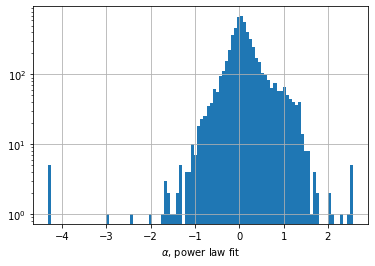

In [198]:
alpha_fits.slope.hist(bins=100)
plt.yscale('log')
plt.xlabel(r'$\alpha$, power law fit')

Text(0, 0.5, 'Confinement level, power law fit')

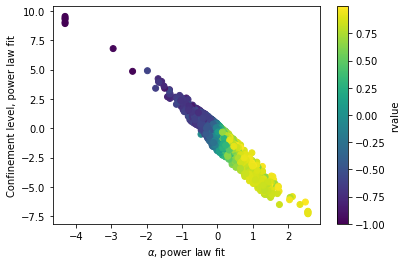

In [19]:
plt.scatter(alpha_fits['slope'], alpha_fits['intercept'], c=alpha_fits['rvalue'])
cnorm = mpl.colors.Normalize(vmin=np.min(alpha_fits['rvalue']), vmax=np.max(alpha_fits['rvalue']))
cmap = plt.get_cmap('viridis')
sm = mpl.cm.ScalarMappable(cnorm, cmap)
sm.set_array([])
cb = plt.colorbar(sm)
cb.set_label('rvalue')
plt.xlabel(r'$\alpha$, power law fit')
plt.ylabel(r'Confinement level, power law fit')


In [180]:
het_fits = burgess.df_flat.loc['HET5', 'WT'].groupby(burgess.cell_cols[2:]).apply(linear_fit)
het_fits = het_fits.apply(pd.Series)
het_fits.columns = ['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']

In [181]:
het_fits.head()

slope  intercept    rvalue        pvalue    stderr
exp.rep meiosis cell                                                       
2       t0      1     0.131061  -0.186090  0.538871  1.929413e-04  0.031997
                7    -0.001073   0.213602 -0.005328  9.729477e-01  0.031460
                8     0.138265  -0.205656  0.659413  1.517690e-06  0.024618
                10   -0.739603   1.965666 -0.730293  8.868632e-08  0.112232
                11   -0.065317   0.135227 -0.320094  3.638902e-02  0.030191

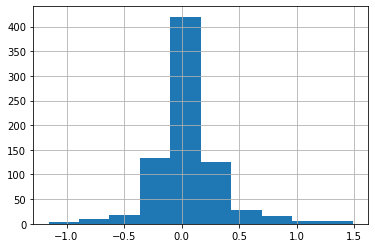

In [182]:
het_fits.slope.hist()

maybe if we break up by condition the fitting parameters will mean something?

In [45]:
alpha_fits.head()

,locus,genotype,exp.rep,meiosis,cell,slope,intercept,rvalue,pvalue,stderr
0,HET5,WT,2,t0,1,0.131061,-0.186090,0.538871,1.929413e-04,0.031997
1,HET5,WT,2,t0,7,-0.001073,0.213602,-0.005328,9.729477e-01,0.031460
2,HET5,WT,2,t0,8,0.138265,-0.205656,0.659413,1.517690e-06,0.024618
3,HET5,WT,2,t0,10,-0.739603,1.965666,-0.730293,8.868632e-08,0.112232
4,HET5,WT,2,t0,11,-0.065317,0.135227,-0.320094,3.638902e-02,0.030191


In [69]:
alpha_fits['D'] = np.power(10, alpha_fits['intercept'])
mean_fits = alpha_fits.groupby(['locus', 'genotype', 'meiosis'])['slope', 'D', 'intercept'].agg(['mean', 'std', 'count'])

In [70]:
mean_alpha = mean_fits['slope'].copy()
mean_D = mean_fits['D'].copy()
mean_intercept = mean_fits['intercept'].copy()

In [71]:
for df in [mean_alpha, mean_D, mean_intercept]:
    df['ste'] = df['std']/np.sqrt(df['count'] - 1)

In [ ]:
for cond, d in alpha_fits.groupby('locus', 'genotype'):
    plt.figure()
    plt.title(r'$\alpha$ for Strain: ' + str(strain))
    cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
    cmap = mpl.cm.get_cmap('viridis')
    cmap.colors[0] = [1, 0, 0] # make t=-1 gray
    cmap.colors[1] = [1, 0, 0] # make t=-1 gray
    sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
    sm.set_array([])
    for meiosis, data in d.groupby('meiosis'):
        t = -1 if meiosis[1] == 'a' else int(meiosis[1])
        #TODO: write
    cb.set_label('Time after spo media (hrs)')
#     plt.yscale('log')
#     plt.xscale('log')
    plt.xlabel('t (s)')
    plt.ylabel('MSD ($\mu{}m^2$)')

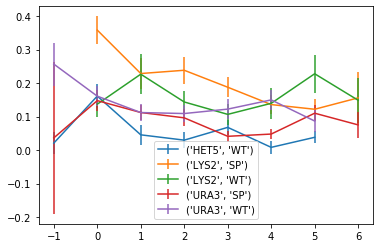

In [58]:
for cond, d in mean_alpha.groupby(['locus', 'genotype']):
    d = d.reset_index()
    d['t'] = d['meiosis'].map(lambda m: -1 if m[1] == 'a' else int(m[1]))
    d = d.sort_values('t')
    plt.errorbar(d['t'], d['mean'], d['ste'], label=str(cond))
plt.legend()

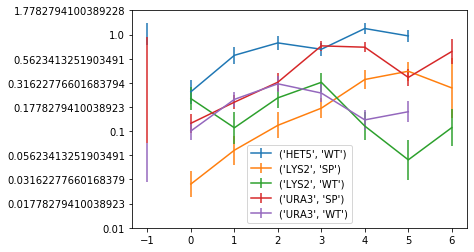

In [87]:
for cond, d in mean_intercept.groupby(['locus', 'genotype']):
    d = d.reset_index()
    d['t'] = d['meiosis'].map(lambda m: -1 if m[1] == 'a' else int(m[1]))
    d = d.sort_values('t')
    da = d[d['t'] < 0]
    d = d[d['t'] >= 0]
    e = plt.errorbar(d['t'], d['mean'], d['ste'], label=str(cond))
    if len(da) > 0:
        plt.errorbar(da['t'], da['mean'], da['ste'], c=e[0].get_color())
plt.legend()
locs, labels = plt.yticks()
labels = [str(10**loc) for loc in locs]
plt.yticks(locs, labels);

## MS(C)Ds Measure Confinement

Compare radius of gyratino to MS(c)D variants for measuring confinement sizes

### Rad of Gyration

In [216]:
def rad_gyration(df, mscd=False):
    if mscd:
        xcol = 'dX'; ycol = 'dY'; zcol= 'dZ';
    else:
        xcol = 'X'; ycol = 'Y'; zcol= 'Z';
    x = df[xcol] - np.mean(df[xcol])
    y = df[ycol] - np.mean(df[ycol])
    z = df[zcol] - np.mean(df[zcol])
    return np.mean(np.sqrt(x**2 + y**2 + z**2))
    

In [217]:
rad_msd = burgess.df.groupby(burgess.traj_cols).apply(rad_gyration)

In [220]:
rad_msd.head()

locus  genotype  exp.rep  meiosis  cell  spot
HET5   WT        2        t0       1     1       0.859873
                                         2       0.874452
                                   7     1       0.784076
                                         2       1.011152
                                   8     1       0.628678
dtype: float64

/home/bbeltr1/.miniconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


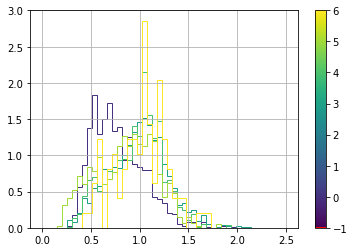

In [221]:
plt.figure()
cmap =  mpl.cm.get_cmap('viridis')
cnorm = mpl.colors.Normalize(vmin=-1, vmax=6)
for d, m in rad_msd.groupby(['locus', 'meiosis']):
    if d[0] != 'URA3':
        continue
    if d[1] not in ['t0', 't3', 't4', 't5', 't6']:
        continue
    m.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(int(d[1][1]))))
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
plt.colorbar(sm)

### MSDs

In [22]:
abs_msd = msds.msd(burgess.df, mscd=False, include_z=True, 
                   traj_group=burgess.cell_cols, 
                   groups=burgess.cell_cols, deltas=[120])

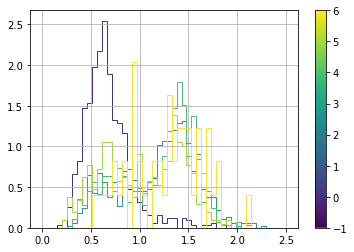

In [212]:
plt.figure()
cmap =  mpl.cm.get_cmap('viridis')
cnorm = mpl.colors.Normalize(vmin=-1, vmax=6)
for d, m in abs_msd.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[2] != 120:
        continue
    if d[1] not in ['t0', 't3', 't4', 't5', 't6']:
        continue
    m.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(int(d[1][1]))))
#     plt.title(d[1])
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.ylim([0.02, 10])
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
plt.colorbar(sm)

### MSCDs

without pair times

In [23]:
abs_mscd = msds.msd(burgess.df_flat[burgess.df_flat['foci'] == 'unp'], mscd=True, include_z=True,
                    traj_group=burgess.cell_cols, groups=burgess.cell_cols, deltas=[120])

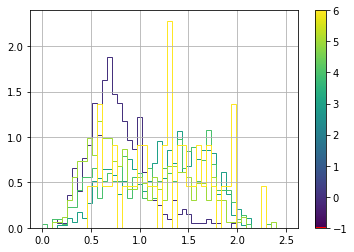

In [211]:
plt.figure()
cmap =  mpl.cm.get_cmap('viridis')
cnorm = mpl.colors.Normalize(vmin=-1, vmax=6)
for d, m in abs_mscd.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[2] != 120:
        continue
    if d[1] not in ['t0', 't3', 't4', 't5', 't6']:
        continue
    m.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(int(d[1][1]))))
#     plt.title(d[1])
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.ylim([0.02, 10])
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
plt.colorbar(sm)

with pair times

In [24]:
abs_mscd_all = msds.msd(burgess.df_flat, mscd=True, include_z=True,
                    traj_group=burgess.cell_cols, groups=burgess.cell_cols, deltas=[120])

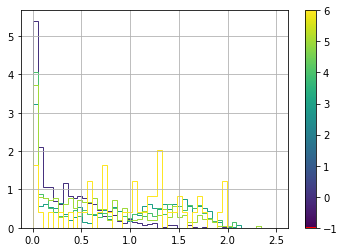

In [215]:
plt.figure()
cmap =  mpl.cm.get_cmap('viridis')
cnorm = mpl.colors.Normalize(vmin=-1, vmax=6)
for d, m in abs_mscd_all.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[2] != 120:
        continue
    if d[1] not in ['t0', 't3', 't4', 't5', 't6']:
        continue
    m.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(int(d[1][1]))))
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
plt.colorbar(sm)

/home/bbeltr1/.miniconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


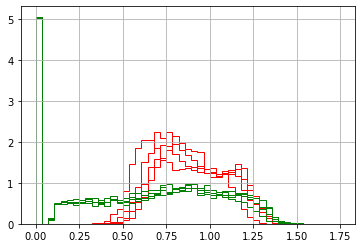

In [7]:
for d, m in abs_msd.groupby('delta')['mean']:
    np.sqrt(m).hist(histtype='step', color='r', normed=1, bins=np.linspace(0, 1.75, 50))
for d, m in mscds.groupby('delta')['mean']:
    np.sqrt(m).hist(histtype='step', color='g', normed=1, bins=np.linspace(0, 1.75, 50))
    

### Are the locus positions actually centered on each other?

In [6]:
burgess.df_flat.head()

t       X1       Y1    Z1  \
locus genotype exp.rep meiosis cell frame                                
HET5  WT       2       t0      1    1        0  2.13328  3.19992  7.75   
                                    2       30  2.53327  1.99995  7.75   
                                    3       60  2.66660  2.39994  7.50   
                                    4       90  2.79993  2.53327  7.50   
                                    5      120  2.93326  2.39994  7.50   

                                                X2       Y2    Z2 foci  na_id  \
locus genotype exp.rep meiosis cell frame                                       
HET5  WT       2       t0      1    1      2.79993  1.99995  7.75  unp      0   
                                    2      2.53327  3.33325  7.75  unp      0   
                                    3      1.99995  3.33325  8.50  unp      0   
                                    4      1.86662  2.93326  8.50  unp      0   
                                    5      1.99995  3.19992  8.50  unp      0   

                                           wait_id       dX       dY   dZ  
locus genotype exp.rep meiosis cell frame                                  
HET5  WT       2       t0      1    1            0  0.66665 -1.19997  0.0  
                                    2            0  0.00000  1.33330  0.0  
                                    3            0 -0.66665  0.93331  1.0  
                                    4            0 -0.93331  0.39999  1.0  
                                    5            0 -0.93331  0.79998  1.0

In [8]:
for d, data in burgess.df_flat.loc['URA3', 'WT'].groupby('meiosis'):
    print(d + " : " + str(data.dX.mean()) + " : " + str(data.dY.mean()) + " : " + str(data.dZ.mean()))

t0 : 0.01425357723577243 : -0.009472723577235814 : 0.14192755733527485
t1 : 0.03326383981582471 : -0.007496076578214006 : 0.21395250212044106
t2 : 0.04353995994065303 : -0.013639619436201827 : 0.3229784866468843
t3 : 0.03304482739212023 : -0.003560469668542845 : 0.33558474046278924
t4 : 0.03495439141667882 : -0.004669516291086494 : 0.20921845844696427
t5 : 0.04239002431610964 : 0.018317677811550193 : 0.1797872340425532
ta : 0.005994020199531978 : 0.0010674282547111806 : 0.08175267890134252


### Assuming centered

In [9]:
burgess.df_flat.head()

t       X1       Y1    Z1  \
locus genotype exp.rep meiosis cell frame                                
HET5  WT       2       t0      1    1        0  2.13328  3.19992  7.75   
                                    2       30  2.53327  1.99995  7.75   
                                    3       60  2.66660  2.39994  7.50   
                                    4       90  2.79993  2.53327  7.50   
                                    5      120  2.93326  2.39994  7.50   

                                                X2       Y2    Z2 foci  na_id  \
locus genotype exp.rep meiosis cell frame                                       
HET5  WT       2       t0      1    1      2.79993  1.99995  7.75  unp      0   
                                    2      2.53327  3.33325  7.75  unp      0   
                                    3      1.99995  3.33325  8.50  unp      0   
                                    4      1.86662  2.93326  8.50  unp      0   
                                    5      1.99995  3.19992  8.50  unp      0   

                                           wait_id       dX       dY   dZ  
locus genotype exp.rep meiosis cell frame                                  
HET5  WT       2       t0      1    1            0  0.66665 -1.19997  0.0  
                                    2            0  0.00000  1.33330  0.0  
                                    3            0 -0.66665  0.93331  1.0  
                                    4            0 -0.93331  0.39999  1.0  
                                    5            0 -0.93331  0.79998  1.0

We can just histogram the distances over time to maximize our use of the data (treat each frame as independent).

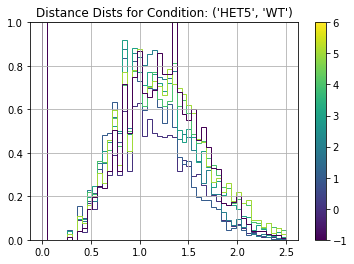

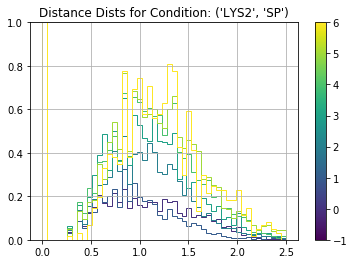

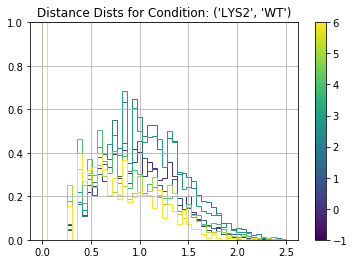

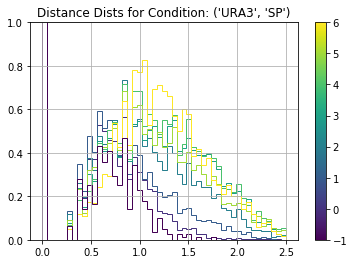

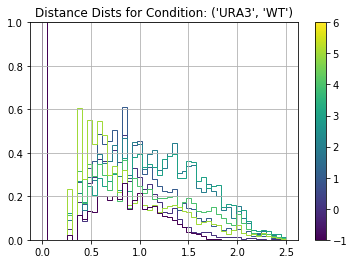

In [18]:
# cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark", as_cmap=True)
cmap = mpl.cm.get_cmap('viridis')
for i in range(10):
    cmap.colors[i] = [1, 0, 0] # make t=-1 red
cnorm = mpl.colors.Normalize(vmin=-1, vmax=6)
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
distances = np.sqrt(burgess.df_flat['dX']**2 + burgess.df_flat['dY']**2 + burgess.df_flat['dZ']**2)
for d, data in distances.groupby(['locus', 'genotype']):
    plt.figure()
    plt.title('Distance Dists for Condition: ' + str(d))
    for d2, dist in data.groupby('meiosis'):
        t = -1 if d2[1] == 'a' else int(d2[1])
        dist.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)))
    plt.ylim([0, 1])
    plt.colorbar(sm)


### All plots for each condition

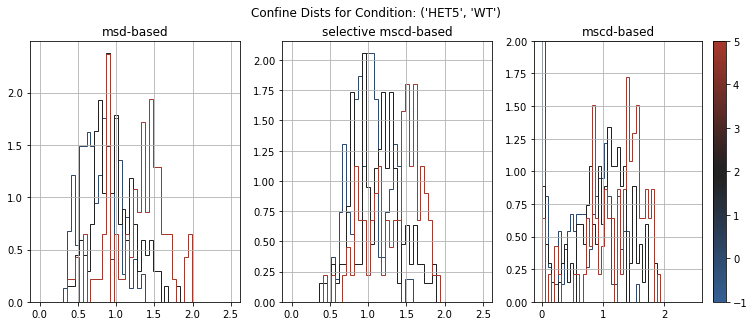

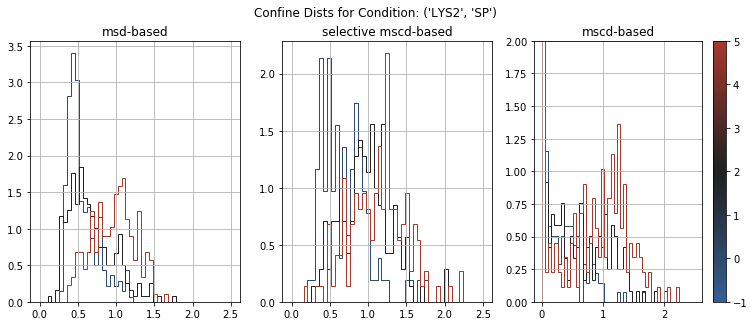

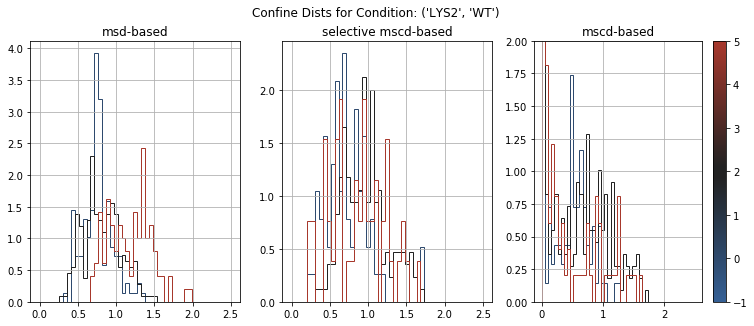

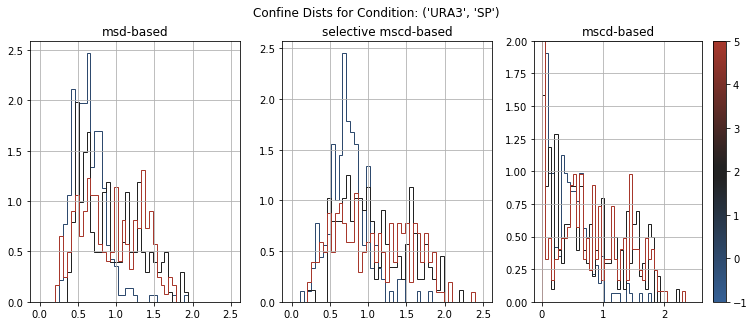

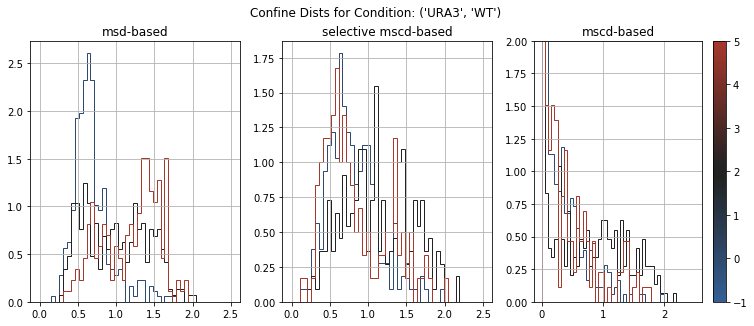

In [91]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark", as_cmap=True)
cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
for d, data in abs_msd.groupby(['locus', 'genotype']):
    fig, axs = plt.subplots(ncols=3, figsize=[12.8, 4.8])
    plt.suptitle('Confine Dists for Condition: ' + str(d))
    for d2, msd in data.groupby('meiosis')['mean']:
        mscd = abs_mscd.loc[d[0], d[1], :, d2]['mean']
        mscd_all = abs_mscd_all.loc[d[0], d[1], :, d2]['mean']
        t = -1 if d2[1] == 'a' else int(d2[1])
        if t not in [0, 2, 5]:
            continue
        msd.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)), ax=axs[0])
        axs[0].set_title('msd-based')
        mscd.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)), ax=axs[1])
        axs[1].set_title('selective mscd-based')
        mscd_all.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)), ax=axs[2])
        axs[2].set_title('mscd-based')
        axs[2].set_ylim([0, 2])
    plt.colorbar(sm)


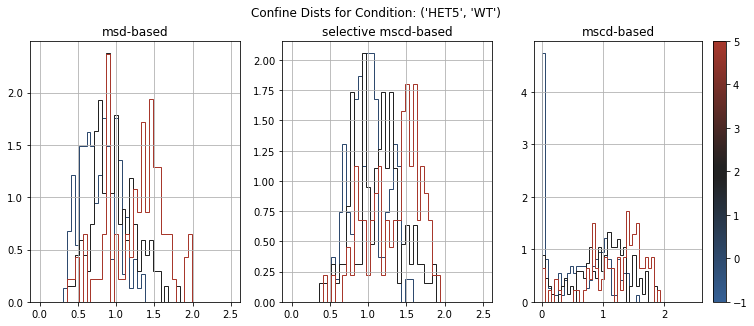

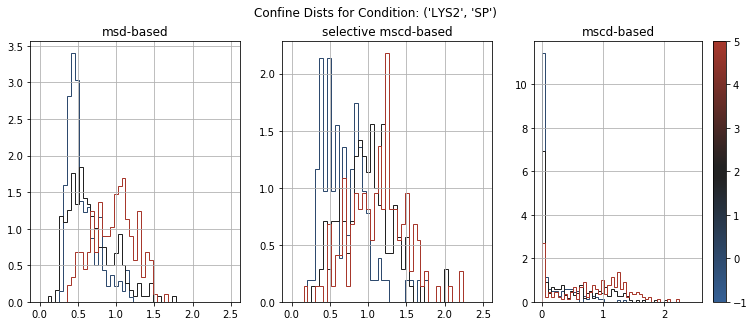

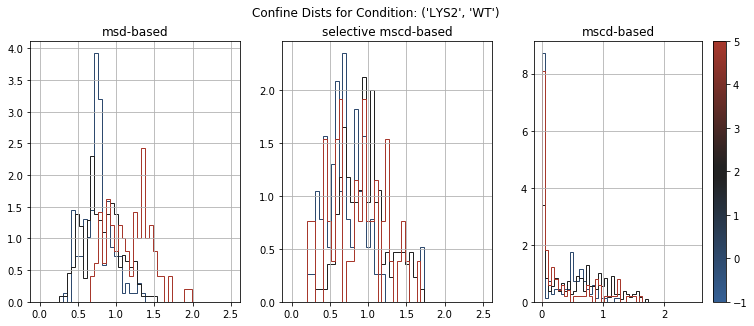

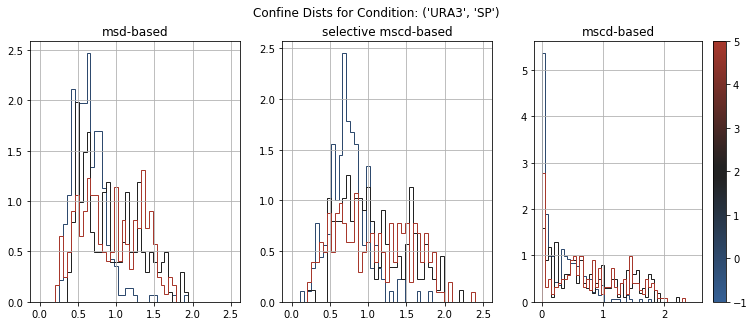

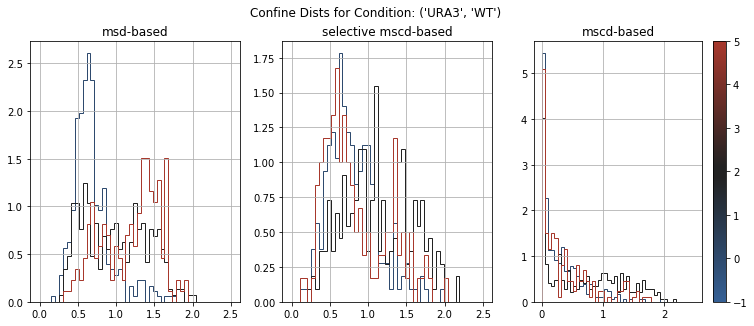

In [90]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark", as_cmap=True)
cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
sm.set_array([])
for d, data in abs_msd.groupby(['locus', 'genotype']):
    fig, axs = plt.subplots(ncols=3, figsize=[12.8, 4.8])
    plt.suptitle('Confine Dists for Condition: ' + str(d))
    for d2, msd in data.groupby('meiosis')['mean']:
        mscd = abs_mscd.loc[d[0], d[1], :, d2]['mean']
        mscd_all = abs_mscd_all.loc[d[0], d[1], :, d2]['mean']
        t = -1 if d2[1] == 'a' else int(d2[1])
        if t not in [0, 2, 5]:
            continue
        msd.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)), ax=axs[0])
        axs[0].set_title('msd-based')
        mscd.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)), ax=axs[1])
        axs[1].set_title('selective mscd-based')
        mscd_all.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(t)), ax=axs[2])
        axs[2].set_title('mscd-based')
#         plt.yscale('log')
    plt.colorbar(sm)


## TODO: figure out what the above histogram should look like if the loops locations are Poisson (as in simulation)

In [ ]:
abs_ms

probability of locus being in a loop of size $n$ is $(1 - f)^{n-1} f$, where $f$ is the "fraction of beads bound" (it is uniformly distributed inside this loop).

the loop is really just like two entropic strings (made of polymer of lengths $N_\Delta$ and $N - N_\Delta$ for a loop of length $N$

$$ k_1 = \frac{3k_B T}{N_\Delta b^2} $$
$$ k_2 = \frac{3k_B T}{(N - N_\Delta) b^2} $$

so 

$$ \langle R^2 \rangle = \frac{3k_BT}{k_1 + k_2} = b^2 \left( \frac{1}{ 1/N_\Delta + 1/(N - N_\Delta) } \right) $$

say green's function in sphere
(first segment at $r_0$, then $r$, then $r_f$). "r" is the "real one", "r_f" and "r_0" are the telomere ends.
$G(r_f | r; N - n) G(r | r_0; n)$,
where 
$G(r | r_0; n) = \sum_{lmj} \Psi(r)\Psi(r_0) C_{lmj}$ 
is
expanded in the basis 
$\Psi_{lmj} = Y_l^m(u_r)Y_l^{m*}(u_{r_0}) j_{lj}(r) j_{lj}(r_0)$ of spherical harmonics and "associated" Bessel functions.

$$ P_L(r, n) = \frac{\int_{\hat{r}_0,\hat{r}_f} G(r_f | r; N - n) G(r | r_0; n)}
{\int_{\hat{r}_0,\hat{r}_f} G(r_f | r_0; n)}. $$

but we evaluate the integrands at $r_0=R-\epsilon$ and $r_f=R-\epsilon$

but since we're expanding in spherical harmonics and it's spherically symmetric, $l$ and $m$ are forced to be zero.

So all we'll end up getting like

$$ \frac{\sum_{j j_0} j_j(R - \epsilon) j_{j_0}(R) j_{j_0}(R - \epsilon) j_{j_0}(R)}
{\sum_j j_j(R - \epsilon) j_j(R - \epsilon)} $$

but notice that

$$ j_n(R - \epsilon) \approx 0 + \frac{\partial j_j(R)}{\partial r} \epsilon + \cdots $$

so we'll have like



$C_n = \exp{-(b^2/R^2)(n\pi^2)/6 N}$ and $j_j(r) = \sin((j\pi/R) r)/((j\pi/R) r)$, and


## Simulation MS(C)Ds

In [ ]:
# # to run the simulation, do the following or similar...
# burgess.simulation.run_homolog_param_scan()

In [ ]:
# # then collate the output data using
# df = burgess.simulation.get_bead_df(base_name)

# # and collect the times which are closest to the experimental times
# desired_t = np.arange(0, 1501, 30)
# sim_t = df['t'].unique()
# ix = np.array([np.argmin(np.abs(ti - sim_t)) for ti in desired_t])
# df_exp = df[np.isin(df['t'], sim_t[ix])]
# df_exp['t'] /= 30
# df_exp['t'] = np.round(df_exp['t'])
# df_exp['t'] *= 30
# df_exp.to_csv('../../homolog-sim/no-tether-more-saves/df_exp.csv')

In [28]:
sim_df = pd.read_csv('../../homolog-sim/no-tether-more-saves/df_exp.csv')

In [31]:
for x in ['X', 'Y', 'Z']:
    sim_df['d'+x] = sim_df[x+'2'] - sim_df[x+'1']

In [32]:
sim_df.columns

Index(['Unnamed: 0', 'FP', 'sim_name', 'bead', 't', 'X1', 'Y1', 'Z1', 'X2',
       'Y2', 'Z2', 'is_loop', 'is_tether', 'dX', 'pair10', 'pair50', 'pair100',
       'pair250', 'pair500', 'pair750', 'pair1000', 'dY', 'dZ'],
      dtype='object')

In [33]:
sim_mscd = burgess.msds.msd(sim_df, mscd=True, include_z=True, 
                 traj_group=['FP', 'sim_name'],
                 groups=['FP'])

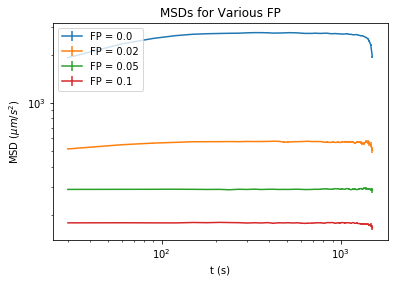

In [37]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (s)')
plt.ylabel('MSCD ($\mu{}m/s^2$)')
plt.title('MSCDs for Various FP')
for fp, data in sim_mscd.groupby('FP'):
    data = data.reset_index()
    data = data[data['delta'] > 0]
    plt.errorbar(data['delta'], data['mean'], data['ste'], label='FP = ' + str(fp))
plt.legend()
# bplt.draw_power_law_triangle(alpha=0.15, x0=[30, 1], width=0.7, orientation='up', x0_logscale=False, label=r'$\alpha=0.15$')
# bplt.draw_power_law_triangle(alpha=0.5, x0=[400, 0.4], width=0.5, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')



In [38]:
sim_cell_mscd = burgess.msds.msd(sim_df, mscd=True, include_z=True, 
                 traj_group=['FP', 'sim_name'],
                 groups=['FP', 'sim_name'])

In [41]:
sim_cell_mscd.head()

mean  \
FP  sim_name                                           delta                
0.0 homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0       0.000000   
    homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0       0.000000   
                                                       30.0   1777.669753   
                                                       60.0   2067.486997   
                                                       90.0   2319.905150   

                                                                     std  \
FP  sim_name                                           delta               
0.0 homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0           NaN   
    homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0      0.000000   
                                                       30.0   785.996489   
                                                       60.0   853.705435   
                                                       90.0   983.345910   

                                                              count  \
FP  sim_name                                           delta          
0.0 homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0        1   
    homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0       51   
                                                       30.0      50   
                                                       60.0      49   
                                                       90.0      48   

                                                                     ste  \
FP  sim_name                                           delta               
0.0 homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0           NaN   
    homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0      0.000000   
                                                       30.0   112.285213   
                                                       60.0   123.221766   
                                                       90.0   143.435743   

                                                                ste_norm  
FP  sim_name                                           delta              
0.0 homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0           NaN  
    homolog-sim/no-tether-more-saves/homolog-sim.to... 0.0      0.000000  
                                                       30.0   111.713827  
                                                       60.0   122.581700  
                                                       90.0   142.674869

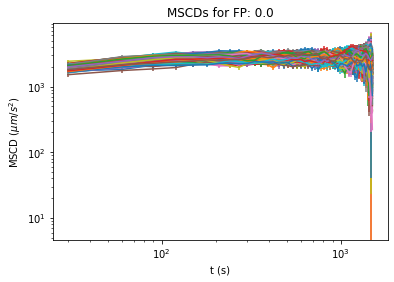

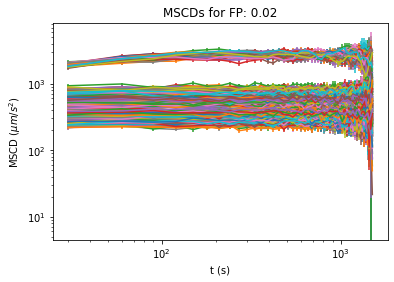

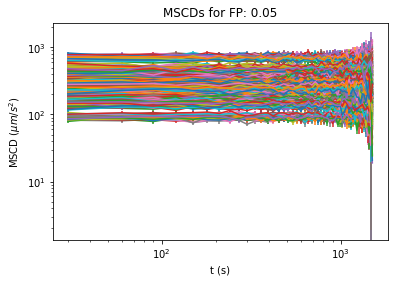

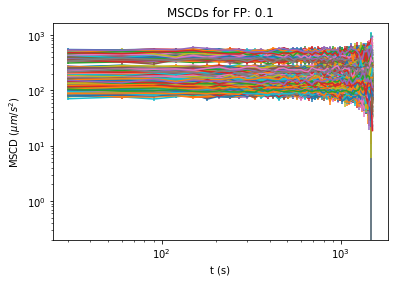

In [43]:
for fp, d in sim_cell_mscd.groupby(['FP']):
    plt.figure()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('t (s)')
    plt.ylabel('MSCD ($\mu{}m/s^2$)')
    plt.title('MSCDs for FP: ' + str(fp))
    cnorm = mpl.colors.Normalize(vmin=-1, vmax=5)
    cmap = mpl.cm.get_cmap('viridis')
    cmap.colors[0] = [1, 0, 0] # make t=-1 gray
    cmap.colors[1] = [1, 0, 0] # make t=-1 gray
    sm = mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap)
    sm.set_array([])
    for cell_id, data in d.groupby('sim_name'):
        data = data.reset_index()
        data = data[data['delta'] > 0]
        plt.errorbar(data['delta'], data['mean'], data['ste'])
#     bplt.draw_power_law_triangle(alpha=0.15, x0=[30, 1], width=0.7, orientation='up', x0_logscale=False, label=r'$\alpha=0.15$')
#     bplt.draw_power_law_triangle(alpha=0.5, x0=[400, 0.4], width=0.5, orientation='down', x0_logscale=False, label=r'$\alpha=0.5$')
    

## Data MS(C)Ds

In [ ]:
mscds = pd.read_csv('/home/bbeltr1/developer/bbeltr1/developer/multi_locus_analysis/')

## Create MSCDs from Exp/Exp Averages of "Heterogeneous" Populations

In [21]:
num_curves = 1000
Ds = np.random.exponential(size=num_curves)
confs = np.random.exponential(size=num_curves)
